# Capstone Project - The Battle of Neighborhoods
## Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business problem <a name="introduction"></a>

The food and restaurant business is in great demand, by companies, universities, workers, students, etc. However, when you want to place a restaurant, you must take into account many factors, such as: work seasons, high and low demand, special days and dates, direct competition, secondary competition and mainly target audience.

Assuming that you already have the necessary capital to place your restaurant, the next thing you must determine is the place where your business would be best located. For this task, you can go to a finance specialist, who will allow you to do a market study and determine all these factors and the most favorable for you, after a considerable time. However, if you do not have that time, if you need to place your restaurant as soon as possible, so that it generates profits, you should go with a person who has good experience with data management, in addition, who can provide you with a answer and a solution to your problem, in a much shorter time.

Therefore, this data analysis is aimed at businessmen or entrepreneurs who want to start a business and are looking for a suitable place to place it.

This project is located in the city of Bogotá - Colombia, more specifically for the town of Chapinero, in which an analysis of the locations is intended to be carried out geographically, in order to determine the best place to place a restaurant.

## Data <a name="data"></a>

As mentioned above, the geographic analysis is carried out on the Chapinero area. This area is selected because it is the sector of the city with the largest number of universities located within the town, in addition to being an area with a good flow of people and a large number of access roads.

The data was extracted from web pages, in which the latitude and longitude data for each of the neighborhoods can be extracted, in addition to allowing the data to be extracted directly in csv format (comma-separated values).

The extraction, cleaning, handling and adjustment of the data was carried out previously, in order to emphasize the analysis of the project and not the operation of the data; for the same reason, the data can be shown already loaded in a pandas dataframe and in its correct structure.

The data is composed of 30 neighborhoods, each with its location in the sector (Borough) and with their respective latitude and longitude values.

In [1]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude
0,Chapinero,Sucre,4.632268,-74.066803
1,Chapinero,Cataluna,4.637752,-74.062538
2,Chapinero,Marly,4.639927,-74.063965
3,Chapinero,Chapinero Central,4.644474,-74.065406
4,Chapinero,Chapinero Norte,4.650260,-74.064364


## Methodology <a name="methodology"></a>

In this section, it is intended to carry out and explain all the necessary procedure to determine the suitable place for the location of the new business. For this, the respective maps will be made and the Foursquare API will be used, to explore the neighborhoods and segment them.
After them, the most frequent places will be extracted and the neighborhoods will be grouped, depending on the variety of places they have, in order to extract an analysis of each sector and each cluster.

***Note:*** The analysis of the sectors and neighborhoods is carried out from the data extracted by Foursquare for the most frequent sites. Data from trending sites is not used, because these data vary a lot over time; since what you are looking for is to place a fixed and stable business, not a temporary business.


The first thing that must be done is to install and import all the libraries that may be necessary for the operation of the data.

In [2]:
!pip install -U numpy
import numpy as np

In [3]:
!pip install -U pandas

In [4]:
!pip install -U scipy==1.4.1

In [5]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 14.3 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [6]:
!pip install -U imbalanced-learn

The next thing is to import the library to make web requests and then execute the function that extracts the data from the API, using the access credentials.

In [7]:
!pip install requests
import requests  # this module helps us to download a web page

The next thing is to import the library that allows the k-means clustering algorithm to be carried out.

In [8]:
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

The next thing is to install and import the libraries to make the maps.

In [9]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


The analysis begins in a simple way, determining the number of boroughs and neighborhoods in the area.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 4 boroughs and 30 neighborhoods.


The next thing is to create the map of Chapinero, from the latitude and longitude values.

In [11]:
address = 'Chapinero, Bogota'

geolocator = Nominatim(user_agent="chapinero_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Chapinero are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Chapinero are 4.6453552, -74.0619385.


In [12]:
# create map of Chapinero using latitude and longitude values
map_chapinero = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chapinero)  
    
map_chapinero

Next, we started using the Foursquare API to explore the neighborhoods and segment them.

The first thing is to set the user credentials and the version of Foursquare.

In [13]:
CLIENT_ID = 'OVTUCWLE2E1E2TEKBSKHG4IGN25OEXKMYSSE3N05LJIW532K' # your Foursquare ID
CLIENT_SECRET = 'VSQMLUKJAXWCHGF1PDRW5F3JAOF21T2BRT4O4BCKJVCRTTNX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OVTUCWLE2E1E2TEKBSKHG4IGN25OEXKMYSSE3N05LJIW532K
CLIENT_SECRET:VSQMLUKJAXWCHGF1PDRW5F3JAOF21T2BRT4O4BCKJVCRTTNX


Then a function is created to extract all the venues from foursquare in each of the neighborhoods of interest.

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
chapinero_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Sucre
Cataluna
Marly
Chapinero Central
Chapinero Norte
Quinta Camacho
Porciuncula
El Retiro
Espartillal
Lago Gaitan
La Cabrera
Antiguo Country
El Chico
Chico Norte III
Chico Norte II
Chico Norte
Los Rosales
Bellavista
El Nogal
La Cabrera
El Refugio
Seminario
Mariscal Sucre
Chapinero Alto
El Castillo
Bosque Calderon
Ingemar
La Salle
Granada
Emaus


After running the function, you can see the results.

In [16]:
print(chapinero_venues.shape)
chapinero_venues.head()

(1664, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Sucre,4.632268,-74.066803,El Fogon de las Sopitas,4.633348,-74.067068,Soup Place
1,Sucre,4.632268,-74.066803,Pizzato,4.631731,-74.064691,Pizza Place
2,Sucre,4.632268,-74.066803,Juan Valdez Café,4.632736,-74.066327,Coffee Shop
3,Sucre,4.632268,-74.066803,La Quiche Javeriana,4.631139,-74.064363,French Restaurant
4,Sucre,4.632268,-74.066803,Ristorante Di Pasta,4.631206,-74.065459,Italian Restaurant


In [17]:
chapinero_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Antiguo Country,74,74,74,74,74,74
Bellavista,28,28,28,28,28,28
Bosque Calderon,34,34,34,34,34,34
Cataluna,67,67,67,67,67,67
Chapinero Alto,53,53,53,53,53,53
Chapinero Central,57,57,57,57,57,57
Chapinero Norte,52,52,52,52,52,52
Chico Norte,64,64,64,64,64,64
Chico Norte II,64,64,64,64,64,64


In [18]:
print('There are {} uniques categories.'.format(len(chapinero_venues['Venue Category'].unique())))

There are 141 uniques categories.


The following will be to analyze each neighborhood, to observe the frequency of occurrence of each category.

In [19]:
# one hot encoding
chapinero_onehot = pd.get_dummies(chapinero_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chapinero_onehot['Neighborhood'] = chapinero_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [chapinero_onehot.columns[-1]] + list(chapinero_onehot.columns[:-1])
chapinero_onehot = chapinero_onehot[fixed_columns]

chapinero_onehot.head()

,Neighborhood,Advertising Agency,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Sucre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sucre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sucre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sucre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sucre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
chapinero_onehot.shape

(1664, 142)

In [21]:
chapinero_grouped = chapinero_onehot.groupby('Neighborhood').mean().reset_index()
chapinero_grouped

,Neighborhood,Advertising Agency,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Antiguo Country,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bellavista,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bosque Calderon,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.029412,0.000000,0.000000,0.029412,0.000000
3,Cataluna,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.029851,0.000000,0.000000,0.014925,0.000000
4,Chapinero Alto,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.037736,0.000000,0.000000,0.018868,0.000000
5,Chapinero Central,0.017544,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,...,0.017544,0.000000,0.000000,0.000000,0.00,0.052632,0.000000,0.000000,0.000000,0.000000
6,Chapinero Norte,0.000000,0.019231,0.000000,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,...,0.038462,0.000000,0.000000,0.000000,0.00,0.057692,0.000000,0.000000,0.019231,0.000000
7,Chico Norte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,...,0.000000,0.000000,0.000000,0.000000,0.00,0.015625,0.000000,0.000000,0.000000,0.000000
8,Chico Norte II,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,...,0.000000,0.000000,0.000000,0.000000,0.00,0.015625,0.000000,0.000000,0.000000,0.000000
9,Chico Norte III,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,...,0.000000,0.000000,0.000000,0.000000,0.00,0.015625,0.000000,0.000000,0.000000,0.000000


In [22]:
chapinero_grouped.shape

(29, 142)

Let's print each neighborhood along with the top 5 most common venues.

In [23]:
num_top_venues = 5

for hood in chapinero_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chapinero_grouped[chapinero_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Antiguo Country----
                venue  freq
0               Hotel  0.11
1  Italian Restaurant  0.07
2          Restaurant  0.07
3         Coffee Shop  0.05
4      Sandwich Place  0.05


----Bellavista----
                      venue  freq
0                Restaurant  0.14
1                     Hotel  0.11
2       Peruvian Restaurant  0.07
3                      Café  0.07
4  Mediterranean Restaurant  0.07


----Bosque Calderon----
                  venue  freq
0            Restaurant  0.09
1                  Café  0.09
2              Beer Bar  0.06
3  Caribbean Restaurant  0.03
4      Sushi Restaurant  0.03


----Cataluna----
                  venue  freq
0                   Bar  0.12
1  Fast Food Restaurant  0.09
2          Burger Joint  0.07
3            Restaurant  0.06
4                  Café  0.06


----Chapinero Alto----
                  venue  freq
0           Pizza Place  0.08
1  Fast Food Restaurant  0.08
2          Burger Joint  0.08
3                   Bar  0.08
4  

All that information is then entered into a dataframe and sorted in descending order. The top 10 places for each neighborhood are also shown.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chapinero_grouped['Neighborhood']

for ind in np.arange(chapinero_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chapinero_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antiguo Country,Hotel,Italian Restaurant,Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Burger Joint,Café,Mediterranean Restaurant,BBQ Joint
1,Bellavista,Restaurant,Hotel,Peruvian Restaurant,Café,Mediterranean Restaurant,Latin American Restaurant,Bed & Breakfast,Spa,Breakfast Spot,Castle
2,Bosque Calderon,Restaurant,Café,Beer Bar,Caribbean Restaurant,Sushi Restaurant,Breakfast Spot,Brewery,Hotel,Hot Dog Joint,Italian Restaurant
3,Cataluna,Bar,Fast Food Restaurant,Burger Joint,Restaurant,Café,Nightclub,Bakery,Latin American Restaurant,Vegetarian / Vegan Restaurant,Market
4,Chapinero Alto,Pizza Place,Fast Food Restaurant,Burger Joint,Bar,Italian Restaurant,Café,Bakery,Music Venue,Nightclub,Hotel


The next thing will be to determine the number of clusters suitable for clustering. This process can be carried out from the Elbow criterion, which allows determining which is the most suitable value of k to use in the k-means algorithm.

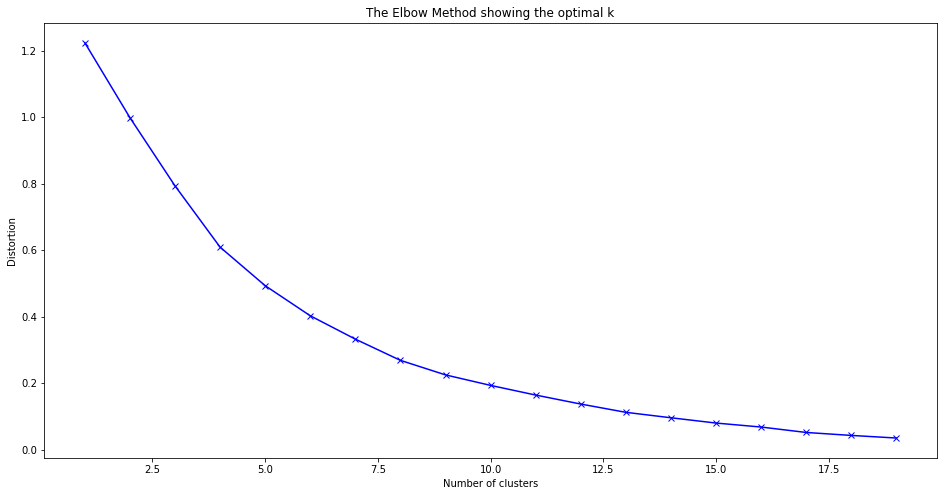

In [26]:
chapinero_grouped_clustering = chapinero_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(chapinero_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As can be seen in the graph, the most marked "elbow" is observed at k = [4-5]. Therefore, this value is chosen as the cluster number in the algorithm.

Run k-means to cluster the neighborhood into 5 clusters.

In [27]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chapinero_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 4, 4, 4, 4, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chapinero_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chapinero_merged = chapinero_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chapinero_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chapinero,Sucre,4.632268,-74.066803,4,Fast Food Restaurant,Italian Restaurant,Pizza Place,Café,Bar,Bakery,Music Venue,Sandwich Place,Coffee Shop,Mexican Restaurant
1,Chapinero,Cataluna,4.637752,-74.062538,4,Bar,Fast Food Restaurant,Burger Joint,Restaurant,Café,Nightclub,Bakery,Latin American Restaurant,Vegetarian / Vegan Restaurant,Market
2,Chapinero,Marly,4.639927,-74.063965,4,Bar,Restaurant,Café,Burger Joint,Fast Food Restaurant,Caribbean Restaurant,Nightclub,Latin American Restaurant,Bakery,Tapas Restaurant
3,Chapinero,Chapinero Central,4.644474,-74.065406,4,Restaurant,Gay Bar,Bar,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Coffee Shop,Bakery,Sandwich Place,Arepa Restaurant
4,Chapinero,Chapinero Norte,4.650260,-74.064364,4,Nightclub,Sandwich Place,Vegetarian / Vegan Restaurant,Department Store,Theater,Coffee Shop,Soccer Field,Bar,Spanish Restaurant,Mexican Restaurant


Then the map with the respective data of the clusters is generated.

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chapinero_merged['Latitude'], chapinero_merged['Longitude'], chapinero_merged['Neighborhood'], chapinero_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

In this section, the results of each of the clusters obtained are presented. In each of the clusters, the respective neighborhoods and their respective preferences in places are identified.

#### Cluster 1 / Cluster Label = 0

In [30]:
chapinero_merged.loc[chapinero_merged['Cluster Labels'] == 0, chapinero_merged.columns[[1] + list(range(5, chapinero_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Quinta Camacho,Restaurant,Coffee Shop,Latin American Restaurant,Italian Restaurant,Juice Bar,Sandwich Place,Argentinian Restaurant,Electronics Store,Vegetarian / Vegan Restaurant,Ice Cream Shop
6,Porciuncula,Restaurant,Hotel,Coffee Shop,Latin American Restaurant,Italian Restaurant,Ice Cream Shop,Bakery,Café,Peruvian Restaurant,Pizza Place
7,El Retiro,Italian Restaurant,Coffee Shop,Ice Cream Shop,Restaurant,Bakery,Latin American Restaurant,Pizza Place,French Restaurant,Japanese Restaurant,Bistro
8,Espartillal,Italian Restaurant,Coffee Shop,Restaurant,Ice Cream Shop,Bakery,French Restaurant,Latin American Restaurant,Pizza Place,Cosmetics Shop,Hotel
9,Lago Gaitan,Coffee Shop,Italian Restaurant,Ice Cream Shop,Pizza Place,Restaurant,Bakery,French Restaurant,Mexican Restaurant,Latin American Restaurant,Caribbean Restaurant
10,La Cabrera,Italian Restaurant,Coffee Shop,Restaurant,Hotel,French Restaurant,Ice Cream Shop,Burger Joint,Bakery,Japanese Restaurant,Brewery
11,Antiguo Country,Hotel,Italian Restaurant,Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Burger Joint,Café,Mediterranean Restaurant,BBQ Joint
12,El Chico,Hotel,Italian Restaurant,Restaurant,Burger Joint,Sandwich Place,Coffee Shop,Mexican Restaurant,BBQ Joint,Café,Pizza Place
13,Chico Norte III,Hotel,Pizza Place,Coffee Shop,Italian Restaurant,Seafood Restaurant,Donut Shop,Pharmacy,Gym / Fitness Center,Burger Joint,Comfort Food Restaurant
14,Chico Norte II,Hotel,Pizza Place,Coffee Shop,Italian Restaurant,Seafood Restaurant,Donut Shop,Pharmacy,Gym / Fitness Center,Burger Joint,Comfort Food Restaurant


#### Cluster 2 / Cluster Label = 1

In [31]:
chapinero_merged.loc[chapinero_merged['Cluster Labels'] == 1, chapinero_merged.columns[[1] + list(range(5, chapinero_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,El Refugio,Gym,Gym / Fitness Center,Park,Yoga Studio,Road,Restaurant,Resort,Record Shop,Pub,Optical Shop


#### Cluster 3 / Cluster Label = 2

In [32]:
chapinero_merged.loc[chapinero_merged['Cluster Labels'] == 2, chapinero_merged.columns[[1] + list(range(5, chapinero_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Seminario,Park,Hotel,Museum,Art Museum,Bakery,Plaza,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy


#### Cluster 4 / Cluster Label = 3

In [33]:
chapinero_merged.loc[chapinero_merged['Cluster Labels'] == 3, chapinero_merged.columns[[1] + list(range(5, chapinero_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Ingemar,Café,Brewery,Restaurant,Hot Dog Joint,Tea Room,Advertising Agency,Pastry Shop,Peruvian Restaurant,Pet Store,Pharmacy


#### Cluster 5 / Cluster Label = 4

In [34]:
chapinero_merged.loc[chapinero_merged['Cluster Labels'] == 4, chapinero_merged.columns[[1] + list(range(5, chapinero_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sucre,Fast Food Restaurant,Italian Restaurant,Pizza Place,Café,Bar,Bakery,Music Venue,Sandwich Place,Coffee Shop,Mexican Restaurant
1,Cataluna,Bar,Fast Food Restaurant,Burger Joint,Restaurant,Café,Nightclub,Bakery,Latin American Restaurant,Vegetarian / Vegan Restaurant,Market
2,Marly,Bar,Restaurant,Café,Burger Joint,Fast Food Restaurant,Caribbean Restaurant,Nightclub,Latin American Restaurant,Bakery,Tapas Restaurant
3,Chapinero Central,Restaurant,Gay Bar,Bar,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Coffee Shop,Bakery,Sandwich Place,Arepa Restaurant
4,Chapinero Norte,Nightclub,Sandwich Place,Vegetarian / Vegan Restaurant,Department Store,Theater,Coffee Shop,Soccer Field,Bar,Spanish Restaurant,Mexican Restaurant
23,Chapinero Alto,Pizza Place,Fast Food Restaurant,Burger Joint,Bar,Italian Restaurant,Café,Bakery,Music Venue,Nightclub,Hotel
24,El Castillo,Fast Food Restaurant,Restaurant,Latin American Restaurant,Burger Joint,Bar,Hotel,Nightclub,Breakfast Spot,Taco Place,Sandwich Place
25,Bosque Calderon,Restaurant,Café,Beer Bar,Caribbean Restaurant,Sushi Restaurant,Breakfast Spot,Brewery,Hotel,Hot Dog Joint,Italian Restaurant
27,La Salle,Restaurant,Vegetarian / Vegan Restaurant,Latin American Restaurant,Café,Italian Restaurant,Arepa Restaurant,Bakery,Gay Bar,Cocktail Bar,Caribbean Restaurant


As can be seen in the results of each cluster, there is at least one neighborhood associated with each of them. Clusters that have a large number of associated neighborhoods imply that those neighborhoods share the same characteristics or fairly similar characteristics.

Such is the case of cluster 1, this cluster has the highest number of associated neighborhoods, with a total of 18 neighborhoods. If emphasis is placed on the most visited places in each of the neighborhoods, it can be seen that among the first three, there is a restaurant in each of them. Not to mention that each neighborhood has between 2 to 5 restaurants as its favorite places, having a variety of French, Italian, Peruvian, Mediterranean, Latin, Argentinian, vegetarian, Japanese, American, fast food, etc.

In a quite similar way it happens with cluster 5, in its top 10 of the most visited places, there is also a great variety of restaurants, of different types of food. However, according to the data collected, in these neighborhoods there are a greater number of bars and nightclubs, so this factor can be useful when choosing the place for the business; but taking into account that what is being sought is the location of a restaurant, these sectors can present high competition.

On the other hand, the other clusters have only one associated neighborhood, which indicates that in these sites, there is much less competition than in the other clusters. However, cluster 4 has two restaurants and a cafeteria in its most visited places, which implies that there may be competition in this sector, despite being only one neighborhood.

Favorable cases occur in clusters 2 and 3. On the one hand, cluster 2 has gyms, yoga studios, resorts in its favorite places, but it does not have restaurants, so this feature can be used a lot to generate profits with little competition, also depending on the type of food that you decide to prepare, you may have a greater demand.
On the other hand, cluster 3 presents a distinction in its most visited places, since these vary between hotels, art museums, pharmacies, museums, among others. Therefore, this characteristic is quite favorable since it is in a sector with increasing demand and very low competition.

## Conclusion <a name="conclusion"></a>

From the results obtained, the choice of the location of the restaurant can be made, which is the objective of this project. As shown in the discussion, cluster 1 has the largest number of neighborhoods, which indicates that they are quite commercial sectors with a fairly large daily flow of people, so if it were decided to place the business in these areas, it would be ensures good demand, but competition would be quite strong. In the same way it happens with cluster 5, it has neighborhoods whose flow of people increases at night, so this characteristic could be exploited, however, a good demand is not ensured during the day. On the other hand, the sector close to cluster 4 generates a lot of uncertainty, due to the varied number of places and some restaurants, cafes and bakeries that would generate some kind of competition in the market.

This project yielded two quite favorable results to facilitate the decision-making of the location of the new restaurant. On the one hand, cluster 2 has very low competition, high demand for a restaurant and with the extra characteristic that its most visited places tend to be fit places, that is, gyms, spas, resorts, yoga studios, etc. Therefore, if you choose this place, you can take advantage of this advantage by placing a fit theme for the business, something like low-fat, vegetarian, dietary, high-protein food, among others, in this way the demand can increase considerably.

On the other hand, in the neighborhood associated with cluster 3, their results implied that it is a fairly cultural area, with a good flow of people and low competition in terms of food, in addition to the fact that in its neighboring places there are museums, churches, parks and other places where you are with the family or in large groups, this advantage can be taken advantage of on special days or dates, even from the business theme you can see a greater flow of people.